In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import sys
sys.path.append("../Experiments/Utils/")
from Utils_Transitive_Annotation import *

rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal', 'xtick.labelsize' : 20,
            'ytick.labelsize' : 20}
plt.rcParams.update(rcParams)


In [5]:
data_dir = '/Users/harihara/Mount-2/projects/RDP_Outlier_Analysis/Gates_Dataset_Experiments/Adversarial_Seqs_Summary/'
df_delta = pd.DataFrame()

files = listdir(data_dir)
for f in files:
    if not f.startswith("."):
        df = pd.read_csv(data_dir+f, sep = "\t")
        df_delta = pd.concat([df, df_delta], axis = 0)
df_delta = df_delta.reset_index()
df_delta[['SA','SB']] = df_delta['Edit_Path'].apply(Extract_SA_SB)
df_delta = df_delta.rename(columns = {'Edit_Path':'SeqID'})

In [9]:
df_delta = df_delta[df_delta['GB']=='Dorea']
df_dorea = df_delta.groupby(['SB','GA','GB']).agg({'index':'count', 'DB':'mean'})
df_dorea = df_dorea.rename(columns = {'index':'Count', 'DA':'Avg_Delta'})
df_dorea = df_dorea.reset_index()

In [10]:
colors = ['red', 'blue', 'lime', 'orange', 'teal', 'grey', 'violet', 'cyan', 'black', 'indigo']
neighboring_genera = df_dorea['GA'].unique()
colors_dict = dict(zip(neighboring_genera, colors))
df_colors = pd.DataFrame(data = {'GA':colors_dict.keys(), 'Color':colors_dict.values()})
df_colors['Angle'] = [i*360/len(df_colors) for i in range(len(df_colors))]
df_dorea = df_dorea.merge(df_colors, on = 'GA')
query_sequences = df_dorea['SB'].unique()

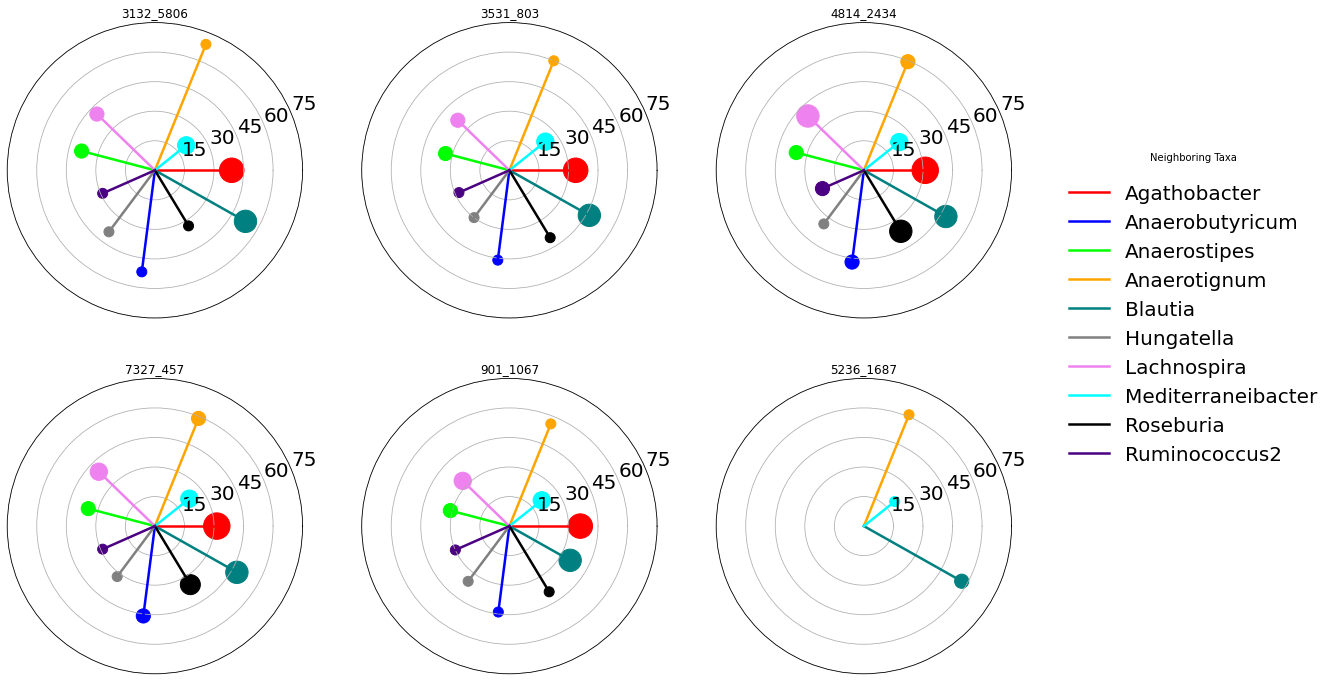

In [11]:
plt.rcParams.update(rcParams)

fig = plt.figure(figsize=(18, 12))
gs = GridSpec(nrows=2, ncols=3)
ax00 = fig.add_subplot(gs[0, 0], projection = 'polar')
ax01 = fig.add_subplot(gs[0, 1], projection = 'polar')
ax02 = fig.add_subplot(gs[0, 2], projection = 'polar')
ax10 = fig.add_subplot(gs[1, 0], projection = 'polar')
ax11 = fig.add_subplot(gs[1, 1], projection = 'polar')
ax12 = fig.add_subplot(gs[1, 2], projection = 'polar')

axes = [ax00, ax01, ax02, ax10, ax11, ax12]
for i in range(0, len(query_sequences)):
    df_sel = df_dorea[df_dorea['SB'] == query_sequences[i]]
    colors = df_sel['Color'].tolist()
    angles = df_sel['Angle'].tolist()
    delta = df_sel['DB'].tolist()
    width = df_sel['Count'].tolist()
    bugs = df_sel['GA'].tolist()
    
    for j in range(0, len(df_sel)):
        axes[i].plot([angles[j], angles[j]], [0, delta[j]], color = colors[j], linewidth = 2.5,
                     label = bugs[j])
    axes[i].scatter(angles, delta, color = colors, s = np.array(width)*100, marker = 'o')
    axes[i].set_xticks([])
    axes[i].set_yticks([15,30,45,60,75])
    axes[i].set_ylim([0, 75])
    axes[i].set_title(query_sequences[i])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=1, ncol = 1, fontsize = 20, frameon = False, 
           bbox_to_anchor = (0.15, -0.25, 1, 1), title= 'Neighboring Taxa\n')
#fig.savefig('Dorea-Example-Supplementary-Figure.pdf',bbox_inches='tight',facecolor = '#FFFFFF')